In [1]:
from scipy.optimize import curve_fit
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from numpy import ma

def gauss_1(x, amp1, cen1, sigma1, offset):
    return amp1 * (np.exp((-1.0 / 2.0) * (((x - cen1) / sigma1) ** 2))) + offset


In [4]:
def load_vac(fname, d, thresh, plot =False):

    ps = []
    if 1:# this is for 7dB cat
        fp1 = [d + f for f in os.listdir(d) if f.endswith(fname +'.h5')]
        files1 = fp1[:]
    #     d2 = "C:/Users/qcrew/Desktop/qcrew/data/squeezing/20221110/"
    #     fp2 = [d2 + f for f in os.listdir(d2) if f.endswith(fname +'.h5')]
    #     fps = np.concatenate([fp1, fp2[:-1]])
    #     decay_times = np.array([1e3, 10e3, 20e3, 35e3, 50e3, 70e3, 100e3, 150e3, 200e3])
        
    dg = []
    de = []
    dts = []

    vac_contrast =1 ## update with real experimental values
    for kk in range(len(files1)):
        fname = files1[kk]
        df = h5py.File(fname, "r")
        data = df["data"]
        data_i = data["I"][:]
        data_q = data['Q'][:]
        dt = df.attrs['decay_time']
        x = data["x"][:, 0]
        #y = data["y"][0, :, 0]

        thresh = thresh
        raw_m0 = data_i[:, 0::3]
        raw_m1 = data_i[:, 1::3] 
        raw_m2 = data_i[:, 2::3]

        m0 = np.where(raw_m0 < thresh, 1, 0)
        m1 = np.where(raw_m1 < thresh, 1, 0)
        m2 = np.where(raw_m2 < thresh, 1, 0)
        
        m1_g = ma.masked_array(m1, mask=m0)
        m2_g = ma.masked_array(m2, mask=m0)

        double_ps_g = ma.masked_array(m2_g, mask=m1).mean(axis=0)*2-1
        double_ps_e = ma.masked_array(m2_g, mask=np.logical_not(m1)).mean(axis=0)*2-1

        dg.append(double_ps_g/vac_contrast)
        de.append(double_ps_e/vac_contrast)
        dts.append(dt)
        

    dg = np.array(dg)
    de = np.array(de)
    dts = np.array(dts)
    decay_times = np.unique(dts)
    dd = {}
    for n in range(len(decay_times)):
            dd[str(decay_times[n])] = []

    for n, dt in enumerate(dts):
        dd[str(dt)].append(dg[n])
        
    d_avg = {}
    for n, dt in enumerate(dts): 
        d_avg[str(dt)] = np.array(dd[str(dt)]).mean(axis=0)


    import math

    rows = len(decay_times)
    cols = 1
    if plot:
        fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
        # for i in range(rows):
        for j in range(rows):
            axes.plot(x, d_avg[str(decay_times[j])][:])
            axes.set_aspect("equal")
            axes.set_title(str(dts[j]))
        #         l += 1      
        plt.show()
    return  d_avg, x
    



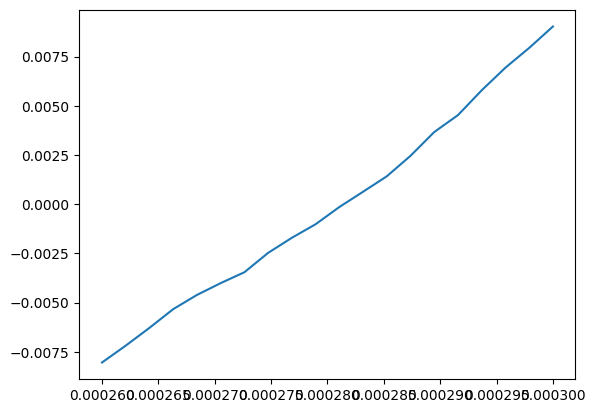

In [5]:
from scipy.optimize import curve_fit


fname = 'panther_normal_vac_1d_x'
d =  "C:/Users/jonat/Desktop/Coding/tcsim/data_analysis/data/all_data_new/"

thresholds = np.linspace(2.6e-4,3e-4, 20)
floor_values = []
for threshold in thresholds:
    data_array, x = load_vac(fname, d, threshold)
    floor_values.append(np.concatenate((data_array["16"][:100],  + data_array["16"][-100:])).mean())
    
plt.plot(thresholds,floor_values)

[ 4.15338337e+02 -1.16388711e-01]
0.00028022626554764297


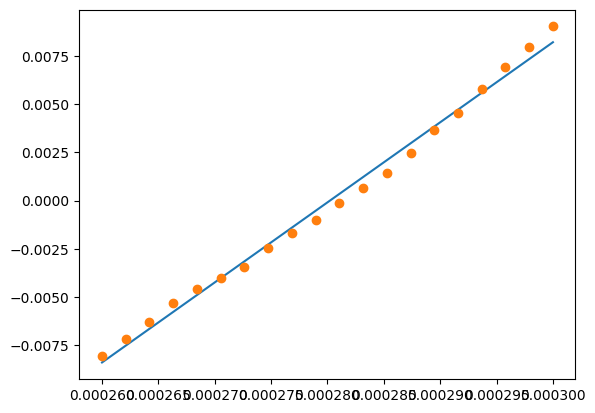

In [6]:
from scipy.optimize import curve_fit

def line(x, m, y):
    return x*m+y
popt, pcov = curve_fit(line, thresholds, floor_values, p0= [0,0])
print(popt)
plt.plot(thresholds,line(np.array(thresholds),*popt))
plt.plot(thresholds,floor_values, 'o')
thresh = (-popt[1]/popt[0])
print(thresh)

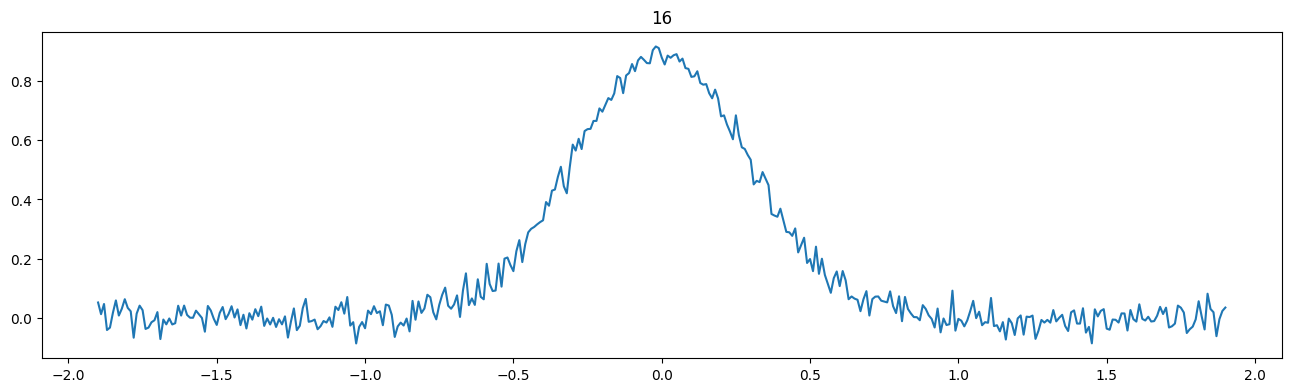

In [7]:
data_array, x = load_vac(fname, d, thresh, plot= True)
data = data_array["16"]

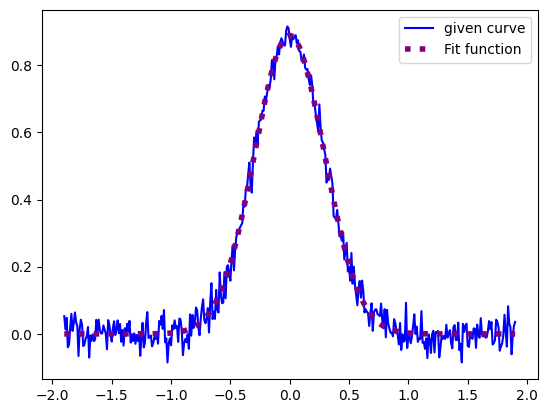

amp =  0.8894158125250794
center =  -0.005469580682385415
sigma =  0.8803439806988278
[ 8.89415813e-01 -5.46958068e-03  8.80343981e-01 -4.74637806e-04]


In [8]:

fig, axs = plt.subplots()

p0 = [ 0.9, 0 , 1, 0.5]
# y0 = gauss_3(x, *initial_guess)

popt, pcov = curve_fit(gauss_1, x*3, data, p0= p0)


axs.plot(x, data, 'b', label="given curve")
axs.plot(x, gauss_1(x*3, *popt), ls=':', label="Fit function", linewidth=4, color='purple')

axs.legend()

plt.show()
print("amp = ", popt[0])
print("center = ", popt[1])
print("sigma = ", popt[2])
print(popt)


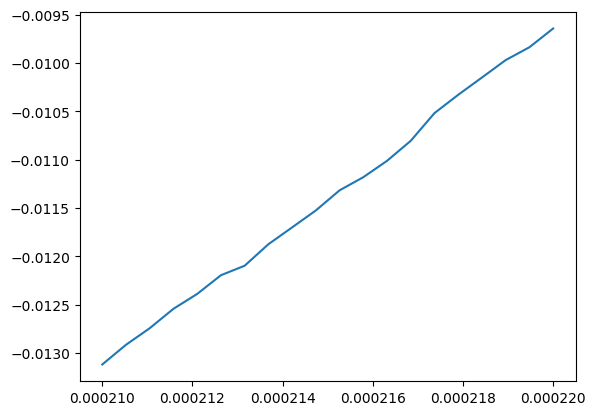

In [9]:
from scipy.optimize import curve_fit


fname = 'panther_normal_vac_1d'
d =  "C:/Users/jonat/Desktop/Coding/tcsim/data_analysis/data/all_data_new/"

thresholds = np.linspace(2.1e-4,2.2e-4, 20)
floor_values = []
for threshold in thresholds:
    data_array, x = load_vac(fname, d, threshold )
    floor_values.append(np.concatenate((data_array["16"][:100],  + data_array["16"][-100:])).mean())
    
plt.plot(thresholds,floor_values)

[ 3.89153595e+02 -8.38042905e-02]
0.0002153501637990907


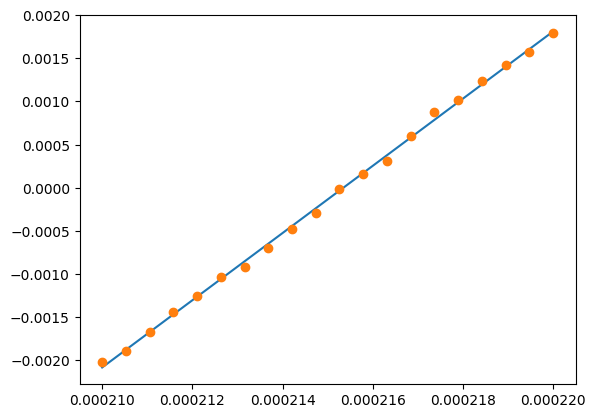

In [69]:
from scipy.optimize import curve_fit

def line(x, m, y):
    return x*m+y
popt, pcov = curve_fit(line, thresholds, floor_values, p0= [0,0])
print(popt)
plt.plot(thresholds,line(np.array(thresholds),*popt))
plt.plot(thresholds,floor_values, 'o')
thresh = (-popt[1]/popt[0])
print(thresh)

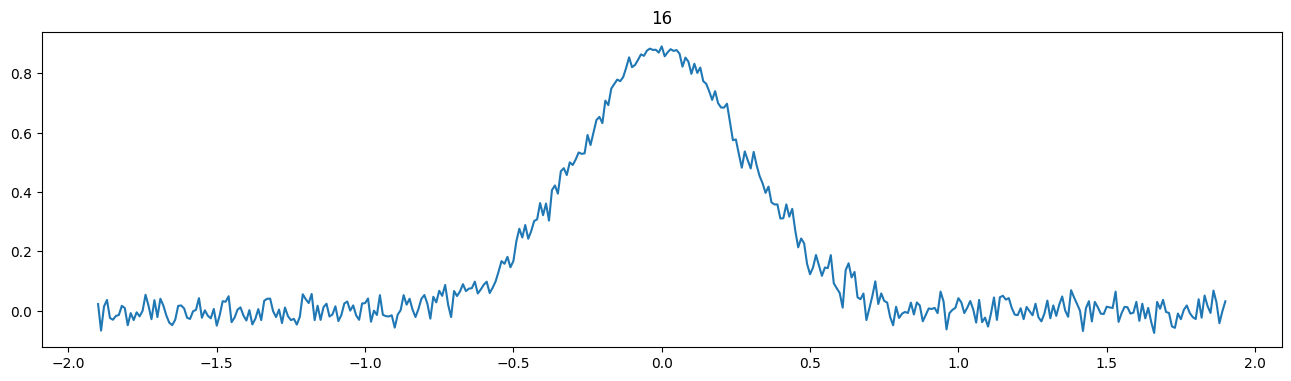

In [70]:
data_array, x = load_vac(fname, d, thresh, plot= True)
data = data_array["16"]

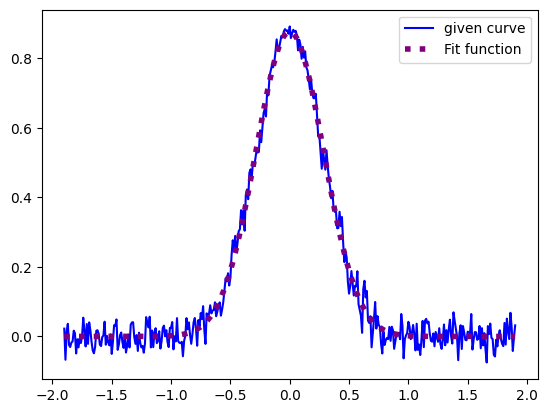

amp =  0.8760130310774089
center =  0.0003592974586884816
sigma =  0.8573536421891613
[8.76013031e-01 3.59297459e-04 8.57353642e-01]


In [71]:

fig, axs = plt.subplots()


    
# y0 = gauss_3(x, *initial_guess)

popt, pcov = curve_fit(gauss_1, x*3, data)


axs.plot(x, data, 'b', label="given curve")
axs.plot(x, gauss_1(x*3, *popt), ls=':', label="Fit function", linewidth=4, color='purple')

axs.legend()

plt.show()
print("amp = ", popt[0])
print("center = ", popt[1])
print("sigma = ", popt[2])
print(popt)


In [72]:
(0.876+0.89)/2

0.883